# Table of Content
- [Imports](#imports)
- [Resources](#resources)
- [Load and Merge Departments Data](#load-and-merge-departments-data)
- [Geographic Regions](#geographic-regions)
- [Customer Behavior in Different Regions](#customer-behavior-in-different-regions)
	- [Determine High Spending and Low Spending Customers](#determine-high-spending-and-low-spending-customers)
	- [Plot Monochromatic](#plot-monochromatic)
	- [Plot Colored](#plot-colored)
- [Exclude low activity users](#exclude-low-activity-users)
- [User profiling](#user-profiling)
- [Customer Profiling by Age](#customer-profiling-by-age)
	- [Distribution](#distribution)
	- [Usage Frequency and Expenditure](#usage-frequency-and-expenditure)
	- [Comparison by Regions](#comparison-by-regions)
	- [Comparison by Department](#comparison-by-department)
- [Customer Profiling by Income](#customer-profiling-by-income)
	- [Distribution](#distribution)
	- [Usage Frequency and Expenditure](#usage-frequency-and-expenditure)
	- [Comparison by Regions](#comparison-by-regions)
	- [Comparison by Department](#comparison-by-department)
- [Customer Profiling by Family Situation](#customer-profiling-by-family-situation)
	- [Distribution](#distribution)
	- [Usage Frequency and Expenditure](#usage-frequency-and-expenditure)
	- [Comparison by Regions](#comparison-by-regions)
	- [Comparison by Department](#comparison-by-department)
- [Customer Profiling by Special Products Bought](#customer-profiling-by-special-products-bought)
	- [Distribution](#distribution)
	- [Usage Frequency and Expenditure](#usage-frequency-and-expenditure)
	- [Comparison by Regions](#comparison-by-regions)
	- [Comparison by Department](#comparison-by-department)
- [Dayily and Weekly Shopping Patterns](#dayily-and-weekly-shopping-patterns)
- [Export](#export)
- [New Plots / Customer Profiling / Impact on Shipping Preferences](#new-plots-/-customer-profiling-/-impact-on-shipping-preferences)


## Imports [#](#table-of-content)

In [1]:
# standard library
from pathlib import Path

# 3rd party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px


# user-defined libraries
import da_helper as da

## Resources [#](#table-of-content)

In [2]:
# project path
project_folder = Path(r"C:\Users\vynde\Desktop\CareerFoundry Data Analytics\Data Immersion - 4 Python Fundamentals for Data Analysts\Instacart_Basket_Analysis")

# resource folders
original_data_folder = project_folder / "02_Data" / "Original_Data"
prepared_data_folder = project_folder / "02_Data" / "Prepared_Data"
plot_folder = project_folder / "04_Analysis" / "Visualizations"

# input files
regions_data_file = original_data_folder / "usa_regions.csv"
departments_data_file = original_data_folder / "departments2.csv"
aisle_data_file = original_data_folder / "aisles.csv"
orders_products_customers_merged_data_file = prepared_data_folder / "orders_products_customers_merged.pkl"

# output files
inactive_user_data_file = prepared_data_folder / "inactive_user_data_file.pkl"
final_data_file = prepared_data_folder / "final_data.pkl"

## Load and Merge Departments Data [#](#table-of-content)

Current working data

In [3]:
df_prev = pd.read_pickle(orders_products_customers_merged_data_file)
df_prev

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_days_since_prior_order,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329.0,1.0,1.0,2.0,8.0,0.0,196.0,1.0,0.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,156685.0,106143.0,26.0,4.0,23.0,5.0,19675.0,1.0,1.0,Organic Raspberry Black Tea,...,High spender,6.5,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755.0
32399728,484769.0,66343.0,1.0,6.0,11.0,0.0,47210.0,1.0,0.0,Fresh Farmed Tilapia Fillet,...,Low spender,24.5,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151.0
32399729,1561557.0,66343.0,2.0,1.0,11.0,30.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Low spender,24.5,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151.0
32399730,276317.0,66343.0,3.0,6.0,15.0,19.0,47210.0,1.0,1.0,Fresh Farmed Tilapia Fillet,...,Low spender,24.5,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151.0


Department names

In [4]:
# load & inspect
df_dep = pd.read_csv(departments_data_file)
# inspect
df_dep

,department_id,department,department_category
0,1,frozen,food
1,2,other,miscellaneous
2,3,bakery,food
3,4,produce,food
4,5,alcohol,beverages
5,6,international,miscellaneous
6,7,beverages,beverages
7,8,pets,miscellaneous
8,9,dry goods pasta,miscellaneous
9,10,bulk,food


In [5]:
# merge & inspect
df_prev_merged_dep = df_prev.merge(df_dep, on="department_id")
df_prev_merged_dep

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,department,department_category
0,2539329.0,1.0,1.0,2.0,8.0,0.0,196.0,1.0,0.0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0,beverages,beverages
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0,beverages,beverages
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0,beverages,beverages
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0,beverages,beverages
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423.0,beverages,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,532733.0,1860.0,4.0,2.0,18.0,15.0,5161.0,1.0,0.0,Dried Mango,...,Non-frequent customer,Female,New Hampshire,35,3/13/2019,1,married,37960.0,bulk,food
32399728,1565024.0,152886.0,2.0,1.0,9.0,30.0,1000.0,3.0,0.0,Apricots,...,Non-frequent customer,Male,Pennsylvania,45,7/9/2017,1,married,41662.0,bulk,food
32399729,2288597.0,87619.0,3.0,3.0,11.0,23.0,5161.0,2.0,0.0,Dried Mango,...,Regular customer,Male,Alabama,47,2/17/2017,2,married,89341.0,bulk,food
32399730,1064360.0,114159.0,3.0,6.0,15.0,30.0,42091.0,5.0,0.0,Pesto Sauce,...,Frequent customer,Female,Montana,26,10/10/2017,1,married,80812.0,bulk,food


Aisle names

In [6]:
df_aisle = pd.read_csv(aisle_data_file)
df_aisle

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [7]:
df_prev_merged_dep_aisle = df_prev_merged_dep.merge(df_aisle, on="aisle_id")
df_prev_merged_dep_aisle

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,department,department_category,aisle
0,2539329.0,1.0,1.0,2.0,8.0,0.0,196.0,1.0,0.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423.0,beverages,beverages,soft drinks
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423.0,beverages,beverages,soft drinks
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423.0,beverages,beverages,soft drinks
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423.0,beverages,beverages,soft drinks
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423.0,beverages,beverages,soft drinks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,1605789.0,58201.0,28.0,5.0,7.0,27.0,5161.0,1.0,1.0,Dried Mango,...,Male,Florida,75,2/8/2019,2,married,138066.0,bulk,food,bulk dried fruits vegetables
32399728,174466.0,195180.0,2.0,2.0,10.0,18.0,1000.0,1.0,0.0,Apricots,...,Male,Arizona,20,2/20/2017,3,living with parents and siblings,60256.0,bulk,food,bulk dried fruits vegetables
32399729,532733.0,1860.0,4.0,2.0,18.0,15.0,5161.0,1.0,0.0,Dried Mango,...,Female,New Hampshire,35,3/13/2019,1,married,37960.0,bulk,food,bulk dried fruits vegetables
32399730,1565024.0,152886.0,2.0,1.0,9.0,30.0,1000.0,3.0,0.0,Apricots,...,Male,Pennsylvania,45,7/9/2017,1,married,41662.0,bulk,food,bulk dried fruits vegetables


Regions

In [8]:
df_regions = pd.read_csv(regions_data_file)
df_regions

,Region,Division,State,State Code
0,Northeast,New England,Maine,ME
1,Northeast,New England,New Hampshire,NH
2,Northeast,New England,Vermont,VT
3,Northeast,New England,Massachusetts,MA
4,Northeast,New England,Rhode Island,RI
5,Northeast,New England,Connecticut,CT
6,Northeast,Middle Atlantic,New York,NY
7,Northeast,Middle Atlantic,Pennsylvania,PA
8,Northeast,Middle Atlantic,New Jersey,NJ
9,Midwest,East North Central,Wisconsin,WI


In [9]:
# Adjust df
df_prev_merged_dep_aisle.rename(columns={"STATE": "State"}, inplace=True)  # rename to match columns to be merged on

# Merge
df = df_prev_merged_dep_aisle.merge(df_regions)

In [10]:
df

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,department,department_category,aisle,Region,Division,State Code
0,2539329.0,1.0,1.0,2.0,8.0,0.0,196.0,1.0,0.0,Soda,...,2/17/2019,3,married,40423.0,beverages,beverages,soft drinks,South,East South Central,AL
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423.0,beverages,beverages,soft drinks,South,East South Central,AL
2,473747.0,1.0,3.0,3.0,12.0,21.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423.0,beverages,beverages,soft drinks,South,East South Central,AL
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423.0,beverages,beverages,soft drinks,South,East South Central,AL
4,431534.0,1.0,5.0,4.0,15.0,28.0,196.0,1.0,1.0,Soda,...,2/17/2019,3,married,40423.0,beverages,beverages,soft drinks,South,East South Central,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,1810819.0,173427.0,32.0,3.0,10.0,4.0,10224.0,5.0,1.0,Organic Hunza Golden Raisins,...,6/1/2018,3,living with parents and siblings,94388.0,bulk,food,bulk dried fruits vegetables,Northeast,Middle Atlantic,NY
32399728,2173447.0,6096.0,1.0,6.0,13.0,0.0,5161.0,14.0,0.0,Dried Mango,...,1/11/2019,0,divorced/widowed,37064.0,bulk,food,bulk dried fruits vegetables,Northeast,Middle Atlantic,NY
32399729,1791374.0,166644.0,3.0,6.0,14.0,12.0,5161.0,4.0,0.0,Dried Mango,...,12/7/2019,2,married,35906.0,bulk,food,bulk dried fruits vegetables,Northeast,Middle Atlantic,NY
32399730,613768.0,37920.0,2.0,0.0,13.0,8.0,1000.0,8.0,0.0,Apricots,...,7/6/2019,3,married,65767.0,bulk,food,bulk dried fruits vegetables,Northeast,Middle Atlantic,NY


Refactor and inspect final dataframe

In [11]:
# refactor column names to snake case
df.columns = df.columns.map(lambda x: x.lower().replace(" ", "_"))

# reorder columns alphabetically
df = df[df.columns.sort_values().to_list()]

# inspect
df

,add_to_cart_order,age,aisle,aisle_id,avg_usr_prices,busiest_day,busiest_period_of_day,date_joined,days_since_prior_order,department,...,price_label,prices,product_id,product_name,region,reordered,spending_flag,state,state_code,user_id
0,1.0,31,soft drinks,77.0,6.367797,Regulary busy,Average orders,2/17/2019,0.0,beverages,...,Mid-range product,9.0,196.0,Soda,South,0.0,Low spender,Alabama,AL,1.0
1,1.0,31,soft drinks,77.0,6.367797,Least busy days,Fewest orders,2/17/2019,15.0,beverages,...,Mid-range product,9.0,196.0,Soda,South,1.0,Low spender,Alabama,AL,1.0
2,1.0,31,soft drinks,77.0,6.367797,Least busy days,Average orders,2/17/2019,21.0,beverages,...,Mid-range product,9.0,196.0,Soda,South,1.0,Low spender,Alabama,AL,1.0
3,1.0,31,soft drinks,77.0,6.367797,Least busy days,Fewest orders,2/17/2019,29.0,beverages,...,Mid-range product,9.0,196.0,Soda,South,1.0,Low spender,Alabama,AL,1.0
4,1.0,31,soft drinks,77.0,6.367797,Least busy days,Average orders,2/17/2019,28.0,beverages,...,Mid-range product,9.0,196.0,Soda,South,1.0,Low spender,Alabama,AL,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399727,5.0,18,bulk dried fruits vegetables,18.0,7.829252,Least busy days,Most orders,6/1/2018,4.0,bulk,...,Mid-range product,5.4,10224.0,Organic Hunza Golden Raisins,Northeast,1.0,Low spender,New York,NY,173427.0
32399728,14.0,74,bulk dried fruits vegetables,18.0,6.730000,Regulary busy,Average orders,1/11/2019,0.0,bulk,...,Mid-range product,6.1,5161.0,Dried Mango,Northeast,0.0,Low spender,New York,NY,6096.0
32399729,4.0,64,bulk dried fruits vegetables,18.0,6.883051,Regulary busy,Average orders,12/7/2019,12.0,bulk,...,Mid-range product,6.1,5161.0,Dried Mango,Northeast,0.0,Low spender,New York,NY,166644.0
32399730,8.0,40,bulk dried fruits vegetables,18.0,7.262264,Busiest days,Average orders,7/6/2019,8.0,bulk,...,Mid-range product,12.9,1000.0,Apricots,Northeast,0.0,Low spender,New York,NY,37920.0


## Geographic Regions [#](#table-of-content)

In [12]:
# Define the color scale based on the regions
region_color_scheme = {
    "Northeast": "#A6C9E3",  # Light blue
    "Midwest": "#B9E3B4",    # Light green
    "South": "#F2A1A1",      # Light red
    "West": "#F9D19C"        # Light orange
}

# Define the color scheme for the regions with reduced luminance
region_color_scheme_dark = {
    "Midwest": "#6CB875",    # Green with reduced luminance
    "Northeast": "#6582A3",  # Blue with reduced luminance
    "South": "#C85E5E",      # Red with reduced luminance
    "West": "#D9A453"        # Orange with reduced luminance
}

# Create the choropleth map
fig = px.choropleth(
    df_regions, 
    locations="State Code", 
    locationmode="USA-states", 
    color="Region",
    scope="usa",
    color_discrete_map=region_color_scheme  # Apply the color scale
)

fig.update_layout(title_text="Region Map")
#fig.savefig(plot_folder / "region_map.png")
fig.show()

## Customer Behavior in Different Regions [#](#table-of-content)

##### Determine High Spending and Low Spending Customers [#](#table-of-content)

In [13]:
# condense to user level and create subset with necessary columns
df_spend_subset = df.groupby("user_id")[["spending_flag", "region"]].first()

In [14]:
# create crosstab for Region and spender type
cross_tab_spend = pd.crosstab(df_spend_subset["region"], df_spend_subset["spending_flag"])
# values MUST be sorted for plotting
cross_tab_spend.sort_values(by="Low spender", ascending=False, inplace=True)

cross_tab_spend

spending_flag,High spender,Low spender
region,,
South,1130,67607
West,898,51667
Midwest,795,47724
Northeast,542,35846


##### Plot Monochromatic [#](#table-of-content)

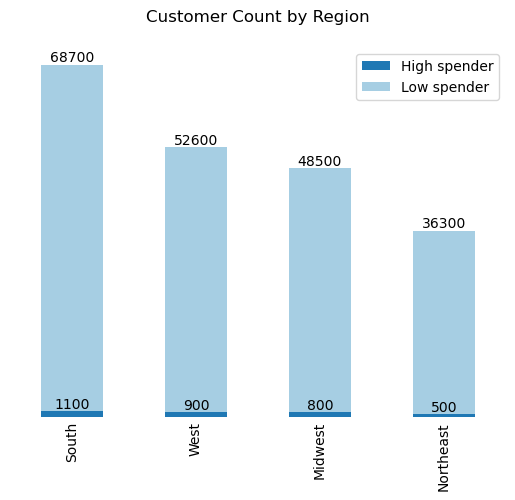

In [15]:
# Plot the stacked bar chart
ax = cross_tab_spend.round(-2).plot(
    kind="bar", 
    stacked=True, 
    color=[cm.Paired(i) for i in [1, 0]], 
    edgecolor="none")

# Set the x-axis and y-axis labels
ax.set_xlabel("")
ax.set_ylabel("")

# Set the title of the chart
ax.set_title("Customer Count by Region\n")

# Show the legend
ax.legend()

# Display the values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge")
    
# Remove the boundary of the axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Remove the ticks
ax.tick_params(axis="both", which="both", length=0, labelleft=False)

# save figure
plt.savefig(plot_folder / "customer count by region 1.png")

##### Plot Colored [#](#table-of-content)

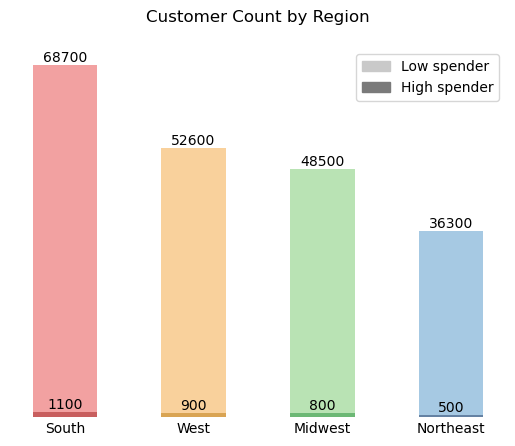

In [16]:
# Create the stacked bar chart
fig, ax = plt.subplots()

# plot each bar seperately to maintain the color scheme for regions
# (standard stacked bar chart can only have different colors for stacks not bars)
# counts are rounded to 100
for i, (region, row) in enumerate(cross_tab_spend.round(-2).iterrows()):
    # high spender bar
    ax.bar(region, row["High spender"], 
           color=region_color_scheme_dark[region],
           width=0.5, 
           edgecolor="none")
    # low spender bar on top
    ax.bar(region, row["Low spender"], 
           bottom=row["High spender"], 
           color=region_color_scheme[region], 
           width=0.5, 
           edgecolor="none")

# Display the values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# Set the title of the chart
ax.set_title("Customer Count by Region\n")

# Custom grayscale legend
legend_dict = {"Low spender": "#C9C9C9", "High spender": "#7A7A7A"}
legend_patches = [plt.Rectangle((0, 0), 1, 1, color=c) for c in legend_dict.values()]
ax.legend(legend_patches, legend_dict.keys())

# Set the x-axis and y-axis labels
ax.set_xlabel("")
ax.set_ylabel("")

# Remove the boundary of the axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

# Remove the ticks
ax.tick_params(axis="both", which="both", length=0, labelleft=False)

# save
plt.savefig(plot_folder / "customer count by region 2.png")

## Exclude low activity users [#](#table-of-content)

In [17]:
# extract subset with inactive users
df_inactive_users = df[df["max_order"] < 5]

In [18]:
# export
df_inactive_users.to_pickle(inactive_user_data_file)

In [19]:
# extract subset with active users
df_active_users = df[df["max_order"] >= 5]


## User profiling [#](#table-of-content)

Users shall be profiled be the following caveats:
- age
- income
- special products bought
- family situation

In [20]:
user_groupby = df_active_users.groupby("user_id")

## Customer Profiling by Age [#](#table-of-content)

Customer will be devided in 3 groups:
- Yound Adults (18-40 years)
- Middle Adults (41-60 years)
- Older Adults (61+)

##### Distribution [#](#table-of-content)

Create profiles

In [21]:
profile_name = "age_profile"
column_name = "age"
limits = [40, 60]
groups = ["Young Adult\n(18-40 yrs)", "Middle Adult\n(41-60 yrs)", "Older Adult\n(61+ yrs)"]


In [22]:
# apply profile to dataframe
da.create_flag(df_active_users, column_name, profile_name, limits, groups)
da.create_flag(df, column_name, profile_name, limits, groups)

c:\Users\vynde\Desktop\CareerFoundry Data Analytics\Data Immersion - 4 Python Fundamentals for Data Analysts\Instacart_Basket_Analysis\03_Scripts\da_helper.py:113: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\vynde\Desktop\CareerFoundry Data Analytics\Data Immersion - 4 Python Fundamentals for Data Analysts\Instacart_Basket_Analysis\03_Scripts\da_helper.py:113: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Get relevent subset

In [23]:
# get user counts per group
# groupby user_id and take first() to get rid of duplicated values
df_user_by_group = user_groupby[profile_name].first().value_counts()

# sort by group order
df_user_by_group = df_user_by_group.T[groups].T

In [24]:
df_active_users

,add_to_cart_order,age,aisle,aisle_id,avg_usr_prices,busiest_day,busiest_period_of_day,date_joined,days_since_prior_order,department,...,prices,product_id,product_name,region,reordered,spending_flag,state,state_code,user_id,age_profile
0,1.0,31,soft drinks,77.0,6.367797,Regulary busy,Average orders,2/17/2019,0.0,beverages,...,9.0,196.0,Soda,South,0.0,Low spender,Alabama,AL,1.0,Young Adult\n(18-40 yrs)
1,1.0,31,soft drinks,77.0,6.367797,Least busy days,Fewest orders,2/17/2019,15.0,beverages,...,9.0,196.0,Soda,South,1.0,Low spender,Alabama,AL,1.0,Young Adult\n(18-40 yrs)
2,1.0,31,soft drinks,77.0,6.367797,Least busy days,Average orders,2/17/2019,21.0,beverages,...,9.0,196.0,Soda,South,1.0,Low spender,Alabama,AL,1.0,Young Adult\n(18-40 yrs)
3,1.0,31,soft drinks,77.0,6.367797,Least busy days,Fewest orders,2/17/2019,29.0,beverages,...,9.0,196.0,Soda,South,1.0,Low spender,Alabama,AL,1.0,Young Adult\n(18-40 yrs)
4,1.0,31,soft drinks,77.0,6.367797,Least busy days,Average orders,2/17/2019,28.0,beverages,...,9.0,196.0,Soda,South,1.0,Low spender,Alabama,AL,1.0,Young Adult\n(18-40 yrs)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32399726,5.0,18,bulk dried fruits vegetables,18.0,7.829252,Busiest days,Average orders,6/1/2018,0.0,bulk,...,5.4,10224.0,Organic Hunza Golden Raisins,Northeast,1.0,Low spender,New York,NY,173427.0,Young Adult\n(18-40 yrs)
32399727,5.0,18,bulk dried fruits vegetables,18.0,7.829252,Least busy days,Most orders,6/1/2018,4.0,bulk,...,5.4,10224.0,Organic Hunza Golden Raisins,Northeast,1.0,Low spender,New York,NY,173427.0,Young Adult\n(18-40 yrs)
32399729,4.0,64,bulk dried fruits vegetables,18.0,6.883051,Regulary busy,Average orders,12/7/2019,12.0,bulk,...,6.1,5161.0,Dried Mango,Northeast,0.0,Low spender,New York,NY,166644.0,Older Adult\n(61+ yrs)
32399730,8.0,40,bulk dried fruits vegetables,18.0,7.262264,Busiest days,Average orders,7/6/2019,8.0,bulk,...,12.9,1000.0,Apricots,Northeast,0.0,Low spender,New York,NY,37920.0,Young Adult\n(18-40 yrs)


Calculate profile count ratios

In [25]:
user_group_ratios = df_user_by_group / df_user_by_group.sum()
user_group_ratios

Young Adult\n(18-40 yrs)     0.357792
Middle Adult\n(41-60 yrs)    0.314540
Older Adult\n(61+ yrs)       0.327668
Name: age_profile, dtype: float64

Plot distribution

(array([0, 1, 2]),
 [Text(0, 0, 'Young Adult\n(18-40 yrs)'),
  Text(1, 0, 'Middle Adult\n(41-60 yrs)'),
  Text(2, 0, 'Older Adult\n(61+ yrs)')])

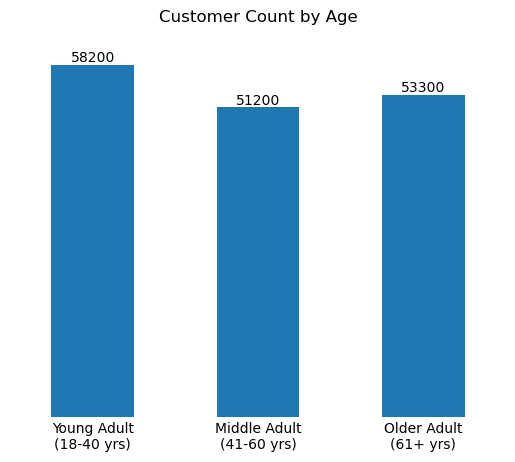

In [26]:
# Plot the distribution
ax = df_user_by_group.round(-2).plot.bar(title="Customer Count by Age\n")

# remove clutter from axes
da.remove_clutter(ax)
plt.tick_params(labelbottom=True)

# Display the values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# save
plt.savefig(plot_folder / "age_profile_dist_bar.png")
plt.xticks(rotation="horizontal")

##### Usage Frequency and Expenditure [#](#table-of-content)

In [27]:
df_active_users.groupby(profile_name).agg({"days_since_prior_order":["min", "max", "mean"], "prices":["min", "max", "mean"]})

days_since_prior_order                  prices  \
                                             min   max       mean    min   
age_profile                                                                
Middle Adult\n(41-60 yrs)                    0.0  30.0  10.244348    1.0   
Older Adult\n(61+ yrs)                       0.0  30.0  10.211091    1.0   
Young Adult\n(18-40 yrs)                     0.0  30.0  10.235214    1.0   

                                           
                            max      mean  
age_profile                                
Middle Adult\n(41-60 yrs)  25.0  7.790580  
Older Adult\n(61+ yrs)     25.0  7.796144  
Young Adult\n(18-40 yrs)   25.0  7.785561

##### Comparison by Regions [#](#table-of-content)

In [28]:
region_by_group = pd.crosstab(df_active_users["region"], df_active_users[profile_name])[groups]
region_by_group = region_by_group.loc[region_by_group.sum(axis=1).sort_values(ascending=False).index]  
region_by_group

age_profile,Young Adult\n(18-40 yrs),Middle Adult\n(41-60 yrs),Older Adult\n(61+ yrs)
region,,,
South,3774320,3174378,3360744
West,2827961,2512934,2585162
Midwest,2590757,2313175,2356374
Northeast,1953635,1701523,1808724


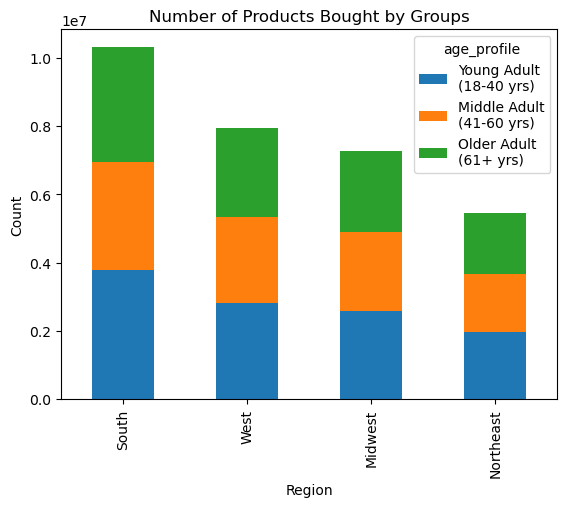

In [29]:
# create and customize bar chart
region_by_group.plot.bar(stacked=True)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Number of Products Bought by Groups")

# save
plt.savefig(plot_folder / "age_profile_region_bar.png")

In [30]:
# calculate ratios
region_by_group_pct = region_by_group.copy()
for col in region_by_group.columns:
    region_by_group_pct[col] = region_by_group[col] / region_by_group.sum(axis=1)

# compare to user count ratios for ages
(region_by_group_pct - user_group_ratios).round(2)

age_profile,Young Adult\n(18-40 yrs),Middle Adult\n(41-60 yrs),Older Adult\n(61+ yrs)
region,,,
South,0.01,-0.01,-0.0
West,-0.00,0.00,-0.0
Midwest,-0.00,0.00,-0.0
Northeast,-0.00,-0.00,0.0


>Ratios almost match the user count ratios

>Different age groups do not have a regional impact.

##### Comparison by Department [#](#table-of-content)

In [31]:
department_by_group = pd.crosstab(df_active_users["department"], df_active_users[profile_name])[groups]
department_by_group = department_by_group.loc[department_by_group.sum(axis=1).sort_values(ascending=True).index]  # sort by sum of all
department_by_group

age_profile,Young Adult\n(18-40 yrs),Middle Adult\n(41-60 yrs),Older Adult\n(61+ yrs)
department,,,
bulk,12103,10419,10929
other,12605,10719,11087
missing,23570,20495,20703
pets,33572,28918,30570
alcohol,53811,45188,45628
international,93195,80218,82578
babies,147664,129709,133019
personal care,152104,134856,137346
breakfast,242034,211277,217539


In [32]:
department_by_group = department_by_group.div(department_by_group.sum(axis=0), axis=1)
department_by_group = department_by_group.div(department_by_group.sum(axis=1), axis=0)

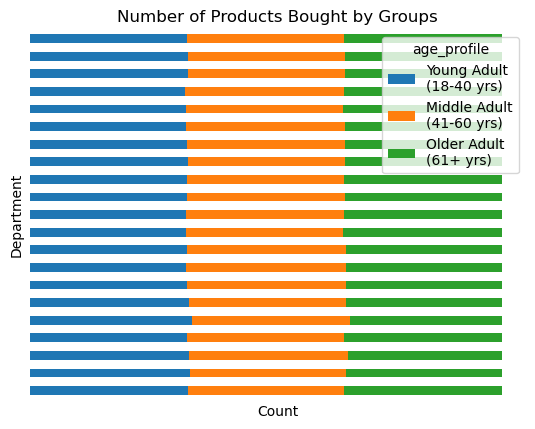

In [33]:
department_by_group.plot.barh(stacked=True)
da.remove_clutter()

plt.xlabel("Count")
plt.ylabel("Department")
plt.title("Number of Products Bought by Groups")

# save
plt.savefig(plot_folder / "age_profile_department_barh.png")

In [34]:
# calculate ratios
department_by_group_pct = department_by_group.copy()
for col in department_by_group.columns:
    department_by_group_pct[col] = department_by_group[col] / department_by_group.sum(axis=1)

# compare to user count ratios for ages
(department_by_group_pct - user_group_ratios).round(2)

age_profile,Young Adult\n(18-40 yrs),Middle Adult\n(41-60 yrs),Older Adult\n(61+ yrs)
department,,,
bulk,-0.02,0.02,0.01
other,-0.02,0.02,0.00
missing,-0.02,0.02,-0.00
pets,-0.02,0.02,0.01
alcohol,-0.01,0.02,-0.01
international,-0.02,0.02,0.00
babies,-0.02,0.02,0.00
personal care,-0.03,0.02,0.00
breakfast,-0.02,0.02,0.00


>Ratios almost match the user count ratios

>Different age groups do not have an impact on departments favored.

## Customer Profiling by Income
 [#](#table-of-content)

Customer will be devided in 3 groups:
- Poor (income is less equals 50,000$)
- Wealthy (income is between 50,000$ and 100,000$)
- Rich (income is higher than 100,000$)

##### Distribution [#](#table-of-content)

Create profiles

In [35]:
profile_name = "income_profile"
column_name = "income"
limits = [50000, 100000]
groups = ["Low income\n(max 50k)", "Middle income\n(50k-100k)", "High income\n(100k+)"]


In [36]:
# apply profile to dataframe
da.create_flag(df_active_users, column_name, profile_name, limits, groups)
da.create_flag(df, column_name, profile_name, limits, groups)

c:\Users\vynde\Desktop\CareerFoundry Data Analytics\Data Immersion - 4 Python Fundamentals for Data Analysts\Instacart_Basket_Analysis\03_Scripts\da_helper.py:113: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\vynde\Desktop\CareerFoundry Data Analytics\Data Immersion - 4 Python Fundamentals for Data Analysts\Instacart_Basket_Analysis\03_Scripts\da_helper.py:113: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Get relevent subset

In [37]:
# get user counts per group
# groupby user_id and take first() to get rid of duplicated values
df_user_by_group = user_groupby[profile_name].first().value_counts()

# sort by group order
df_user_by_group = df_user_by_group.T[groups].T

Calculate profile count ratios

In [38]:
user_group_ratios = df_user_by_group / df_user_by_group.sum()
user_group_ratios

Low income\n(max 50k)        0.155999
Middle income\n(50k-100k)    0.417115
High income\n(100k+)         0.426886
Name: income_profile, dtype: float64

Plot distribution

(array([0, 1, 2]),
 [Text(0, 0, 'Low income\n(max 50k)'),
  Text(1, 0, 'Middle income\n(50k-100k)'),
  Text(2, 0, 'High income\n(100k+)')])

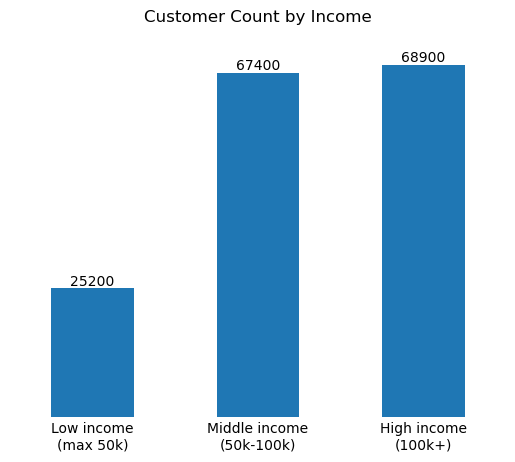

In [39]:
# Plot the distribution
ax = df_user_by_group.round(-2).plot.bar(title="Customer Count by Income\n")

# remove clutter from axes
da.remove_clutter(ax)
plt.tick_params(labelbottom=True)

# Display the values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# save
plt.savefig(plot_folder / "income_profile_dist_bar.png")
plt.xticks(rotation="horizontal")

##### Usage Frequency and Expenditure [#](#table-of-content)

In [40]:
df_active_users.groupby(profile_name).agg({"days_since_prior_order":["min", "max", "mean"], "prices":["min", "max", "mean"]})

days_since_prior_order                  prices  \
                                             min   max       mean    min   
income_profile                                                             
High income\n(100k+)                         0.0  30.0  10.207659    1.0   
Low income\n(max 50k)                        0.0  30.0  10.528791    1.0   
Middle income\n(50k-100k)                    0.0  30.0  10.191293    1.0   

                                           
                            max      mean  
income_profile                             
High income\n(100k+)       25.0  7.957041  
Low income\n(max 50k)      25.0  6.707347  
Middle income\n(50k-100k)  25.0  7.889856

##### Comparison by Regions [#](#table-of-content)

In [41]:
region_by_group = pd.crosstab(df_active_users["region"], df_active_users[profile_name])[groups]
region_by_group = region_by_group.loc[region_by_group.sum(axis=1).sort_values(ascending=False).index]  # sort by sum of all
region_by_group

income_profile,Low income\n(max 50k),Middle income\n(50k-100k),High income\n(100k+)
region,,,
South,1142572,4504913,4557755
West,849081,3451208,3547680
Midwest,783764,3077568,3320012
Northeast,587137,2361030,2464808


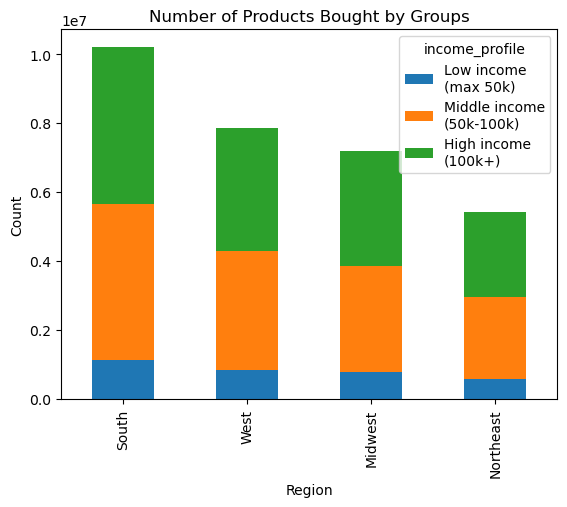

In [42]:
region_by_group.plot.bar(stacked=True)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Number of Products Bought by Groups")

# save
plt.savefig(plot_folder / "income_profile_region_bar.png")

In [43]:
# calculate ratios
region_by_group_pct = region_by_group.copy()
for col in region_by_group.columns:
    region_by_group_pct[col] = region_by_group[col] / region_by_group.sum(axis=1)

# compare to user count ratios for ages
(region_by_group_pct - user_group_ratios).round(2)

income_profile,Low income\n(max 50k),Middle income\n(50k-100k),High income\n(100k+)
region,,,
South,-0.04,0.02,0.02
West,-0.05,0.02,0.03
Midwest,-0.05,0.01,0.04
Northeast,-0.05,0.02,0.03


>Ratios slightly differ with the user count ratios

>Different income could have a regional impact.

##### Comparison by Department [#](#table-of-content)

In [44]:
department_by_group = pd.crosstab(df_active_users["department"], df_active_users[profile_name])[groups]
department_by_group = department_by_group.loc[department_by_group.sum(axis=1).sort_values(ascending=True).index]  # sort by sum of all
department_by_group

income_profile,Low income\n(max 50k),Middle income\n(50k-100k),High income\n(100k+)
department,,,
bulk,4676,14557,14187
other,3886,14776,15180
missing,6547,28769,29013
pets,8612,39359,42771
alcohol,18047,57438,61302
international,21636,114368,117503
babies,29240,184456,194143
personal care,47782,183112,188491
breakfast,91408,281848,289646


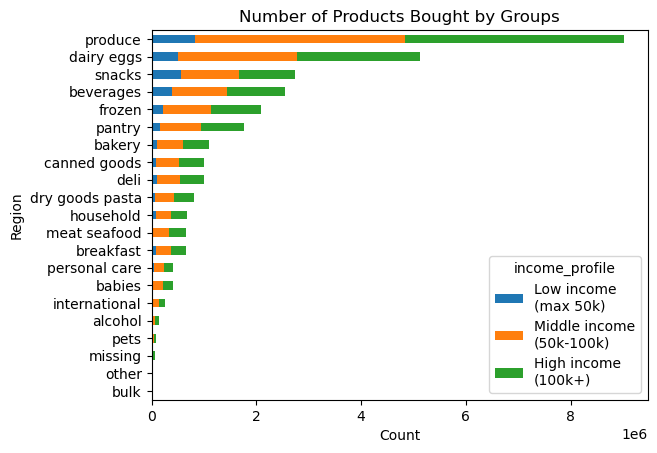

In [45]:
department_by_group.plot.barh(stacked=True)
plt.xlabel("Count")
plt.ylabel("Region")
plt.title("Number of Products Bought by Groups")

# save
plt.savefig(plot_folder / "income_profile_department_barh.png")

In [46]:
# calculate ratios
department_by_group_pct = department_by_group.copy()
for col in department_by_group.columns:
    department_by_group_pct[col] = department_by_group[col] / department_by_group.sum(axis=1)

# compare to user count ratios for ages
(department_by_group_pct - user_group_ratios).round(2)

income_profile,Low income\n(max 50k),Middle income\n(50k-100k),High income\n(100k+)
department,,,
bulk,-0.02,0.02,-0.00
other,-0.04,0.02,0.02
missing,-0.05,0.03,0.02
pets,-0.06,0.02,0.04
alcohol,-0.02,0.00,0.02
international,-0.07,0.03,0.04
babies,-0.08,0.04,0.05
personal care,-0.04,0.02,0.02
breakfast,-0.02,0.01,0.01


>Ratios differ from the user count ratios

>Depending on the department, income seems to have an impact

>Espacially meat and seefood is less bought from customers with lower income

## Customer Profiling by Family Situation
 [#](#table-of-content)

Customer will be devided in 3 groups:
- Single (no dependants)
- Parents (married with children)
- Childless (married without children)

In [47]:
df_user_level = user_groupby.first()

In [48]:
df_user_level["n_dependants"].value_counts()

0    40727
1    40689
3    40612
2    40603
Name: n_dependants, dtype: int64

In [49]:
pd.crosstab(df_user_level["n_dependants"], df_user_level["fam_status"])

fam_status,divorced/widowed,living with parents and siblings,married,single
n_dependants,,,,
0,13831,0,0,26896
1,0,2554,38135,0
2,0,2553,38050,0
3,0,2501,38111,0


##### Distribution [#](#table-of-content)

Create profiles

In [50]:
profile_name = "fam_profile"
column_name = "n_dependants"
limits = [0, 1, 2]
groups = ["Single", "Parent", "Childless Couple"]

In [51]:

# profile part for family situation
# single:    0 dependants
# parent:    >=2 dependants or 1 dependant and nor married
# childless: 1 dependant and married

# create flag with for Single and Parent
da.create_flag(df_active_users, column_name, profile_name, [0], groups[:2])
da.create_flag(df, column_name, profile_name, [0], groups[:2])


c:\Users\vynde\Desktop\CareerFoundry Data Analytics\Data Immersion - 4 Python Fundamentals for Data Analysts\Instacart_Basket_Analysis\03_Scripts\da_helper.py:113: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\vynde\Desktop\CareerFoundry Data Analytics\Data Immersion - 4 Python Fundamentals for Data Analysts\Instacart_Basket_Analysis\03_Scripts\da_helper.py:113: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
# correct false Parent with Childless
df_active_users.loc[(df_active_users[column_name]==1) & (df_active_users["fam_status"]=="married"), profile_name] = groups[-1]
df.loc[(df[column_name]==1) & (df["fam_status"]=="married"), profile_name] = groups[-1]

# apply profile to dataframe
# create_flag(df_active_users, column_name, profile_name, limits, groups)

Get relevent subset

In [53]:
# get user counts per group
# groupby user_id and take first() to get rid of duplicated values
df_user_by_group = user_groupby[profile_name].first().value_counts()

# sort by group order
# df_user_by_group = df_user_by_group.T[groups].T

In [54]:
df_user_by_group

Parent              83769
Single              40727
Childless Couple    38135
Name: fam_profile, dtype: int64

Calculate profile count ratios

In [55]:
user_group_ratios = df_user_by_group / df_user_by_group.sum()
user_group_ratios

Parent              0.515086
Single              0.250426
Childless Couple    0.234488
Name: fam_profile, dtype: float64

Plot distribution

(array([0, 1, 2]),
 [Text(0, 0, 'Parent'), Text(1, 0, 'Single'), Text(2, 0, 'Childless Couple')])

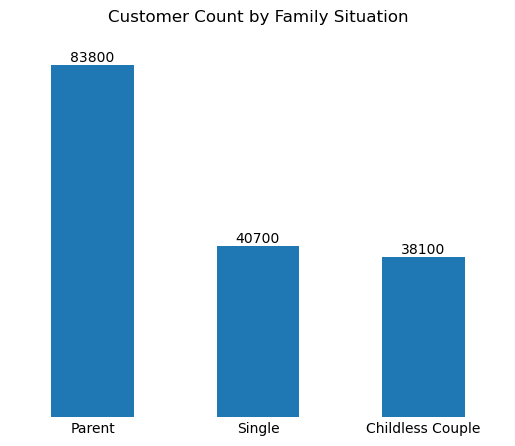

In [56]:
# Plot the distribution
ax = df_user_by_group.round(-2).plot.bar(title="Customer Count by Family Situation\n")

# remove clutter from axes
da.remove_clutter(ax)
plt.tick_params(labelbottom=True)

# Display the values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# save
plt.savefig(plot_folder / "family_profile_dist_bar.png")
plt.xticks(rotation="horizontal")

##### Usage Frequency and Expenditure [#](#table-of-content)

In [57]:
df_active_users.groupby(profile_name).agg({"days_since_prior_order":["min", "max", "mean"], "prices":["min", "max", "mean"]})

days_since_prior_order                  prices        \
                                    min   max       mean    min   max   
fam_profile                                                             
Childless Couple                    0.0  30.0  10.231307    1.0  25.0   
Parent                              0.0  30.0  10.237763    1.0  25.0   
Single                              0.0  30.0  10.213514    1.0  25.0   

                            
                      mean  
fam_profile                 
Childless Couple  7.795589  
Parent            7.788842  
Single            7.789550

##### Comparison by Regions [#](#table-of-content)

In [58]:
region_by_group = pd.crosstab(df_active_users["region"], df_active_users[profile_name])[groups]
region_by_group = region_by_group.loc[region_by_group.sum(axis=1).sort_values(ascending=False).index]  # sort by sum of all
region_by_group

fam_profile,Single,Parent,Childless Couple
region,,,
South,2581512,5359360,2368570
West,1980188,4113181,1832688
Midwest,1822531,3718403,1719372
Northeast,1354277,2820269,1289336


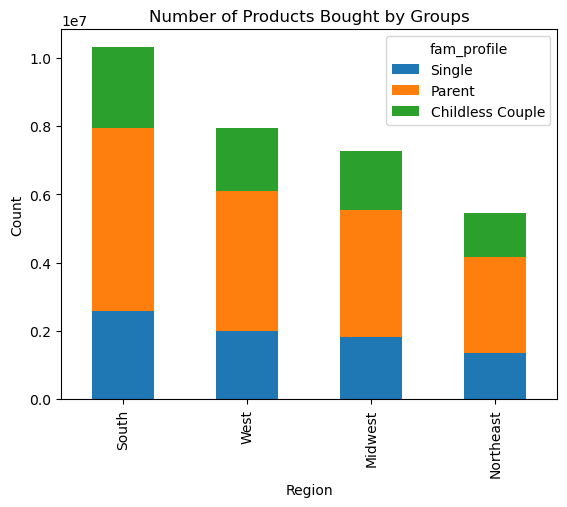

In [59]:
region_by_group.plot.bar(stacked=True)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Number of Products Bought by Groups")

# save
plt.savefig(plot_folder / "family_profile_region_bar.png")

In [60]:
# calculate ratios
region_by_group_pct = region_by_group.copy()
for col in region_by_group.columns:
    region_by_group_pct[col] = region_by_group[col] / region_by_group.sum(axis=1)

# compare to user count ratios for ages
(region_by_group_pct - user_group_ratios).round(2)

,Childless Couple,Parent,Single
region,,,
South,-0.0,0.0,-0.0
West,-0.0,0.0,-0.0
Midwest,0.0,-0.0,0.0
Northeast,0.0,0.0,-0.0


>Ratios almost match the user count ratios for ages

>Family situation does not have a regional impact.

##### Comparison by Department [#](#table-of-content)

In [61]:
department_by_group = pd.crosstab(df_active_users["department"], df_active_users[profile_name])[groups]
department_by_group = department_by_group.loc[department_by_group.sum(axis=1).sort_values(ascending=True).index]  # sort by sum of all
department_by_group

fam_profile,Single,Parent,Childless Couple
department,,,
bulk,8000,17357,8094
other,8714,17560,8137
missing,15935,33917,14916
pets,23602,48070,21388
alcohol,36827,74550,33250
international,64461,131094,60436
babies,103328,214229,92835
personal care,106205,219072,99029
breakfast,166432,346470,157948


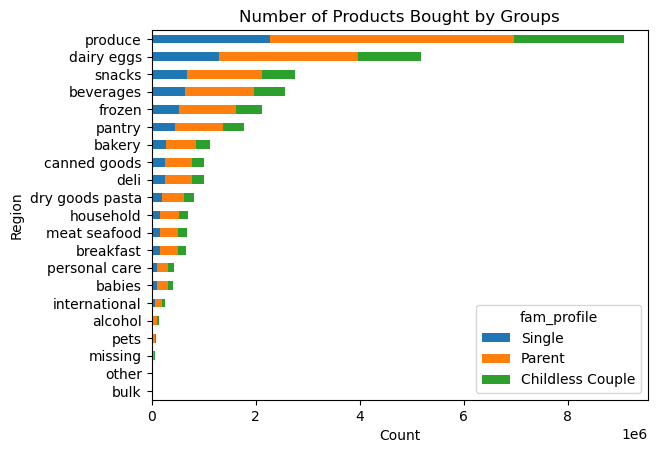

In [62]:
department_by_group.plot.barh(stacked=True)
plt.xlabel("Count")
plt.ylabel("Region")
plt.title("Number of Products Bought by Groups")

# save
plt.savefig(plot_folder / "family_profile_department_barh.png")

In [63]:
# calculate ratios
department_by_group_pct = department_by_group.copy()
for col in department_by_group.columns:
    department_by_group_pct[col] = department_by_group[col] / department_by_group.sum(axis=1)

# compare to user count ratios for ages
(department_by_group_pct - user_group_ratios).round(2)

,Childless Couple,Parent,Single
department,,,
bulk,0.01,0.00,-0.01
other,0.00,-0.00,0.00
missing,-0.00,0.01,-0.00
pets,-0.00,0.00,0.00
alcohol,-0.00,0.00,0.00
international,0.00,-0.00,0.00
babies,-0.01,0.01,0.00
personal care,-0.00,0.00,-0.00
breakfast,0.00,0.00,-0.00


>Ratios almost match the user count ratios

>Family situatiuon does not have a impact on departments favored.

## Customer Profiling by Special Products Bought
 [#](#table-of-content)

> Party products are considered to be alcohol, deli, beverages and meat/seafood products
Customer will be devided in 2 groups:
- Party Shopper (buying more party products than other products)
- Non Party Shopper (buying more products from other departments)
> 

##### Distribution [#](#table-of-content)

Create variable to identify party shopper

In [64]:
profile_name = "party_profile"
groups = ["Party Product", "Non-Party Product"]


In [65]:
# mark products containing alcohol, deli, beverages, and meat/seafood
df_active_users.loc[df_active_users["department_id"].isin([5, 20, 7, 12]), "party_product"] = True
df_active_users.loc[~df_active_users["department_id"].isin([5, 20, 7, 12]), "party_product"] = False
df.loc[df["department_id"].isin([5, 20, 7, 12]), "party_product"] = True
df.loc[~df["department_id"].isin([5, 20, 7, 12]), "party_product"] = False

C:\Users\vynde\AppData\Local\Temp\ipykernel_80944\3437808118.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vynde\AppData\Local\Temp\ipykernel_80944\3437808118.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:

# getting party products and total counts
df_party = df_active_users.groupby("user_id").agg({"party_product": ["sum", "count"]})
df_party


party_product      
                   sum count
user_id                     
1.0                 13    59
2.0                 31   195
3.0                  5    88
4.0                  7    18
7.0                 72   206
...                ...   ...
206203.0            23   119
206206.0            40   285
206207.0            34   223
206208.0            70   677
206209.0            18   129

[162631 rows x 2 columns]

<AxesSubplot:>

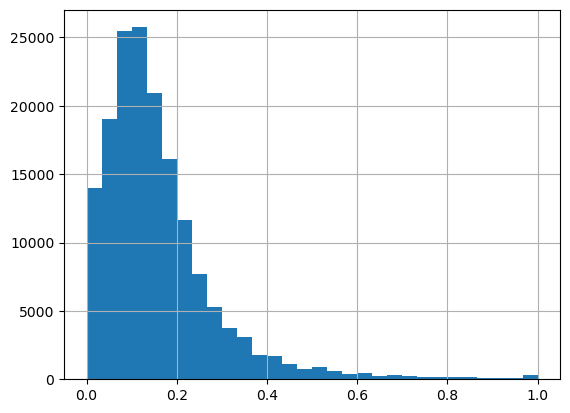

In [67]:
# calculate fraction of party products to total products bought
party_pct_per_user = (df_party["party_product"]["sum"] / df_party["party_product"]["count"])
party_pct_per_user.hist(bins=30)

In [68]:
# apply variable
df_active_users.loc[:,'party_prod_pct'] = party_pct_per_user[df_active_users['user_id']].values

C:\Users\vynde\AppData\Local\Temp\ipykernel_80944\3919470069.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
profile_name = "party_profile"
column_name = "party_prod_pct"
limits = [0.5]
groups = ["Normal Shopper", "Party Shopper\n(mostly buys party products)"]


In [70]:
# apply profile to dataframe
da.create_flag(df_active_users, column_name, profile_name, limits, groups)

c:\Users\vynde\Desktop\CareerFoundry Data Analytics\Data Immersion - 4 Python Fundamentals for Data Analysts\Instacart_Basket_Analysis\03_Scripts\da_helper.py:113: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Get relevent subset

In [71]:
# get user counts per group
# groupby user_id and take first() to get rid of duplicated values
df_user_by_group = user_groupby[profile_name].first().value_counts()

# sort by group order
df_user_by_group = df_user_by_group.T[groups].T

Calculate profile count ratios

In [72]:
user_group_ratios = df_user_by_group / df_user_by_group.sum()
user_group_ratios

Normal Shopper                                 0.974691
Party Shopper\n(mostly buys party products)    0.025309
Name: party_profile, dtype: float64

Plot distribution

(array([0, 1]),
 [Text(0, 0, 'Normal Shopper'),
  Text(1, 0, 'Party Shopper\n(mostly buys party products)')])

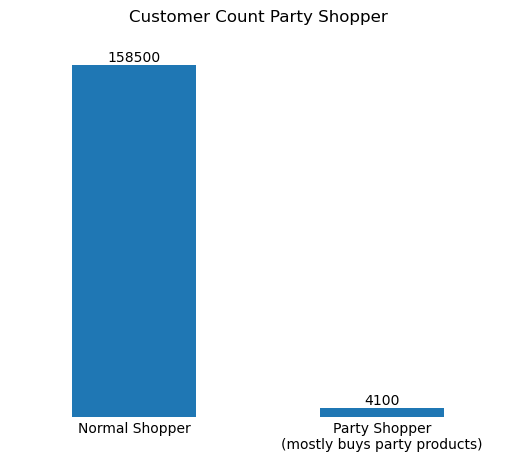

In [73]:
# Plot the distribution
ax = df_user_by_group.round(-2).plot.bar(title="Customer Count Party Shopper\n")

# remove clutter from axes
da.remove_clutter(ax)
plt.tick_params(labelbottom=True)

# Display the values on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type="edge")

# save
plt.savefig(plot_folder / "party_profile_dist_bar.png")
plt.xticks(rotation="horizontal")

##### Usage Frequency and Expenditure [#](#table-of-content)

In [74]:
df_active_users.groupby(profile_name).agg({"days_since_prior_order":["min", "max", "mean"], "prices":["min", "max", "mean"]})

days_since_prior_order        \
                                                               min   max   
party_profile                                                              
Normal Shopper                                                 0.0  30.0   
Party Shopper\n(mostly buys party products)                    0.0  30.0   

                                                       prices                  
                                                  mean    min   max      mean  
party_profile                                                                  
Normal Shopper                               10.228714    1.0  25.0  7.792151  
Party Shopper\n(mostly buys party products)  10.388523    1.0  25.0  7.624130

##### Comparison by Regions [#](#table-of-content)

In [75]:
region_by_group = pd.crosstab(df_active_users["region"], df_active_users[profile_name])[groups]
region_by_group = region_by_group.loc[region_by_group.sum(axis=1).sort_values(ascending=False).index]  # sort by sum of all
region_by_group

party_profile,Normal Shopper,Party Shopper\n(mostly buys party products)
region,,
South,10211193,98249
West,7855988,70069
Midwest,7193180,67126
Northeast,5411824,52058


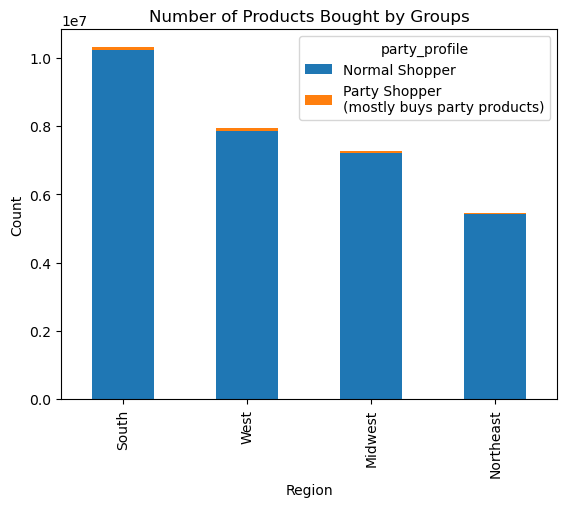

In [76]:
region_by_group.plot.bar(stacked=True)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Number of Products Bought by Groups")

# save
plt.savefig(plot_folder / "party_profile_region_bar.png")

In [77]:
# calculate ratios
region_by_group_pct = region_by_group.copy()
for col in region_by_group.columns:
    region_by_group_pct[col] = region_by_group[col] / region_by_group.sum(axis=1)

# compare to user count ratios for ages
(region_by_group_pct - user_group_ratios).round(2)

party_profile,Normal Shopper,Party Shopper\n(mostly buys party products)
region,,
South,0.02,-0.02
West,0.02,-0.02
Midwest,0.02,-0.02
Northeast,0.02,-0.02


##### Comparison by Department [#](#table-of-content)

In [78]:
department_by_group = pd.crosstab(df_active_users["department"], df_active_users[profile_name])[groups]
department_by_group = department_by_group.loc[department_by_group.sum(axis=1).sort_values(ascending=True).index]  # sort by sum of all
department_by_group

party_profile,Normal Shopper,Party Shopper\n(mostly buys party products)
department,,
bulk,33352,99
other,33820,591
missing,64231,537
pets,92740,320
alcohol,107997,36630
international,255066,925
babies,410130,262
personal care,421444,2862
breakfast,667318,3532


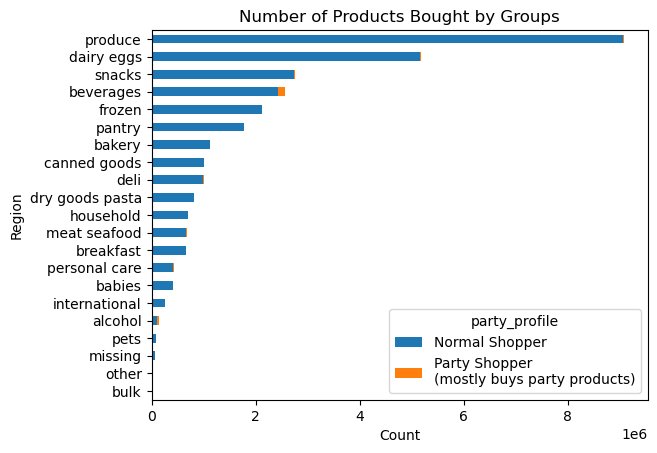

In [79]:
department_by_group.plot.barh(stacked=True)
plt.xlabel("Count")
plt.ylabel("Region")
plt.title("Number of Products Bought by Groups")

# save
plt.savefig(plot_folder / "party_profile_department_barh.png")

In [80]:
# calculate ratios
department_by_group_pct = department_by_group.copy()
for col in department_by_group.columns:
    department_by_group_pct[col] = department_by_group[col] / department_by_group.sum(axis=1)

# compare to user count ratios for ages
(department_by_group_pct - user_group_ratios).round(2)

party_profile,Normal Shopper,Party Shopper\n(mostly buys party products)
department,,
bulk,0.02,-0.02
other,0.01,-0.01
missing,0.02,-0.02
pets,0.02,-0.02
alcohol,-0.23,0.23
international,0.02,-0.02
babies,0.02,-0.02
personal care,0.02,-0.02
breakfast,0.02,-0.02


>Ofcourse we can see an impact here at the departments belonging to the "party shopper departments"

## Dayily and Weekly Shopping Patterns [#](#table-of-content)

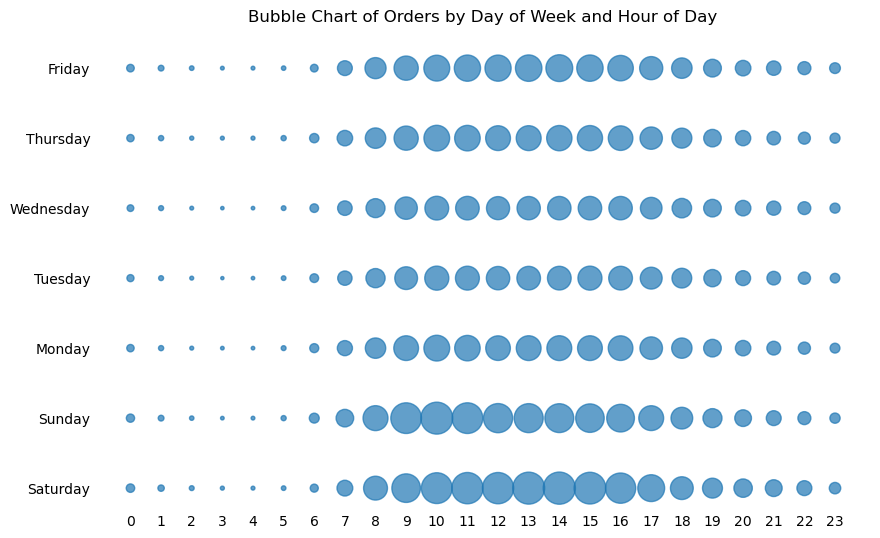

In [81]:
days = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
extended_crosstab_df = pd.crosstab(df_active_users["orders_day_of_week"], df_active_users["order_hour_of_day"]).reindex(index=range(7), columns=range(24), fill_value=0)

x = extended_crosstab_df.columns
y = extended_crosstab_df.index
sizes = extended_crosstab_df.values.flatten()  # Flattening the values into a 1D array


# Create a mesh grid of x and y values
X, Y = np.meshgrid(x, y)

# Create the bubble chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(X, Y, s=sizes/1000, alpha=0.7)

plt.yticks(range(7), days)
plt.xticks(range(24))

# Customize the chart appearance
plt.title("Bubble Chart of Orders by Day of Week and Hour of Day\n")
plt.xlabel("Order Hour of Day")
plt.ylabel("")

da.remove_clutter(plt.gca())
plt.tick_params(labelbottom=True, labelleft=True)

plt.savefig(plot_folder / "orders_by_day_and_hour.png")

In [82]:
extended_crosstab_df.values.sum()

30959687

Most products are bought during the weekend around noon.

## Export [#](#table-of-content)

In [83]:
df.to_pickle(final_data_file)

## New Plots / Customer Profiling / Impact on Shipping Preferences [#](#table-of-content)

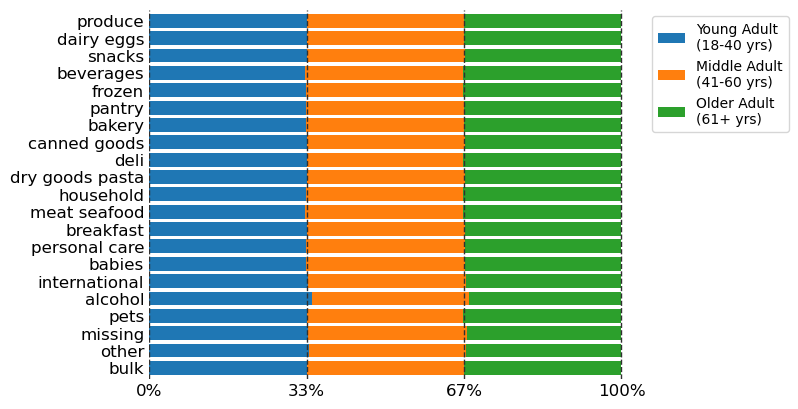

In [84]:
da.bar100(data=df_active_users, x="age_profile", y="department", xorder=["young", "middle", "old"])

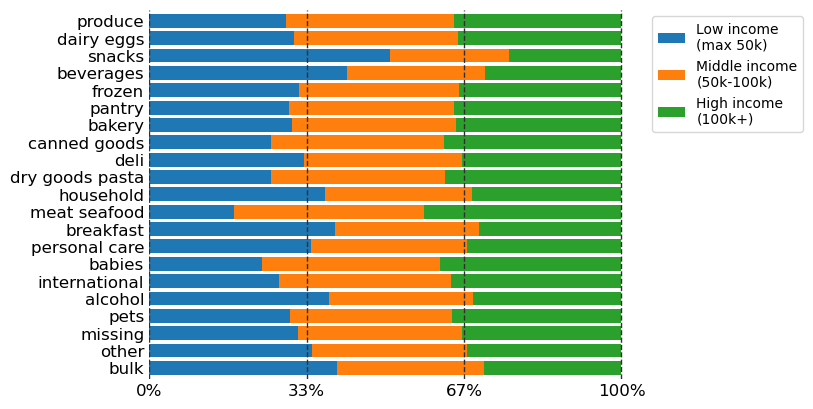

In [85]:

da.bar100(df_active_users, "income_profile", "department", xorder=["low", "middle", "high"])

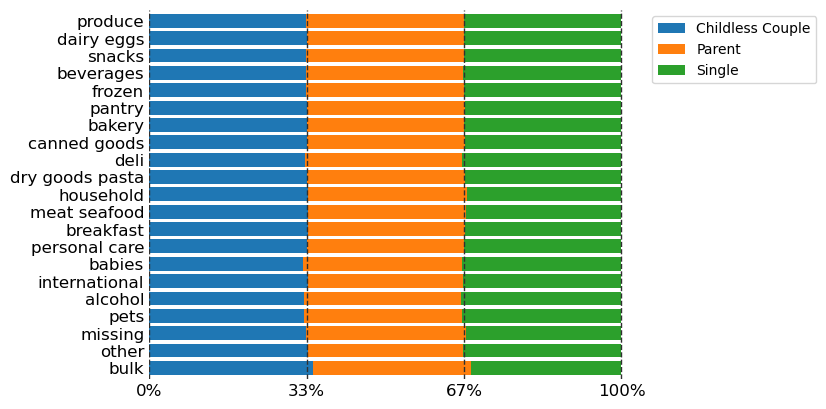

In [86]:
da.bar100(df_active_users, "fam_profile", "department")

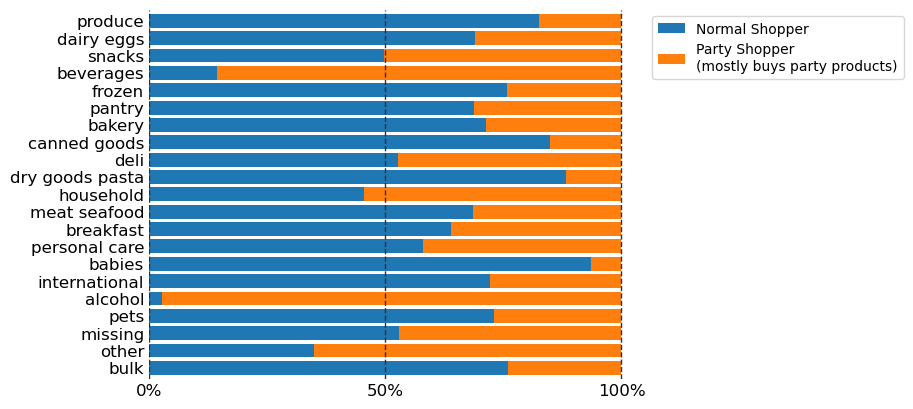

In [87]:
da.bar100(df_active_users, "party_profile", "department")